### Machine Learning Final Project

#### Project name: Date-A-Scientist
#### Data: profiles.csv

In [117]:
#Importing libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Investigating given profile data

In [260]:
#Loading data
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [119]:
print("Total number of columns in dataframe:", profiles.columns.nunique())
print("Total number of rows in dataframe:", len(profiles))

Total number of columns in dataframe: 31
Total number of rows in dataframe: 59946


In [120]:
print(list(profiles.columns))

['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job', 'last_online', 'location', 'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status']


Short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

In [121]:
print(profiles.dtypes)

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object


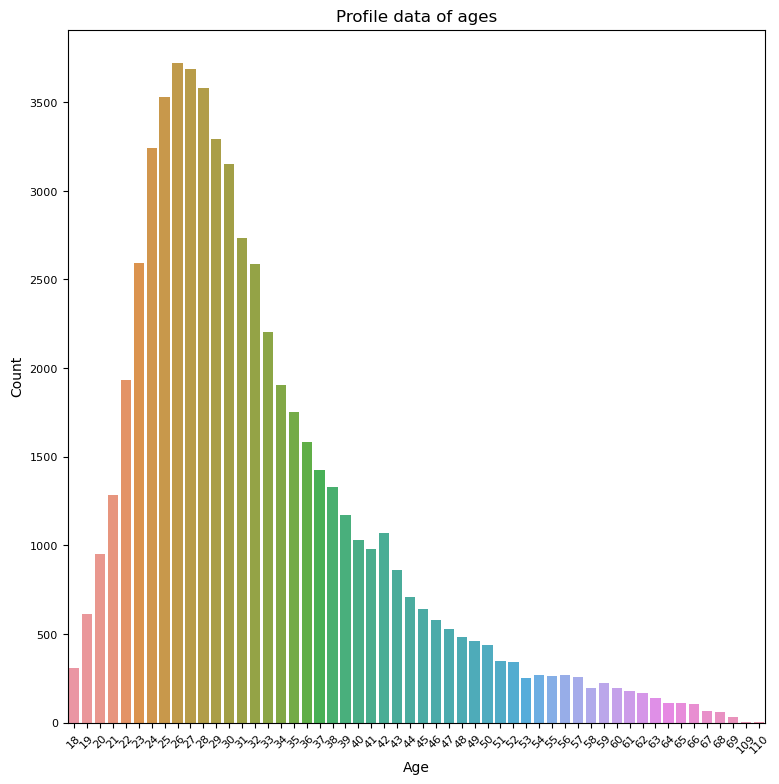

In [346]:
Age_distribution = profiles.age.value_counts()
Age_distribution = Age_distribution.reset_index()
Age_distribution.columns = ['Ages', 'Counts']

plt.figure(figsize=(9, 9))
sns.barplot(x='Ages', y='Counts', data=Age_distribution)
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Profile data of ages')
plt.show()

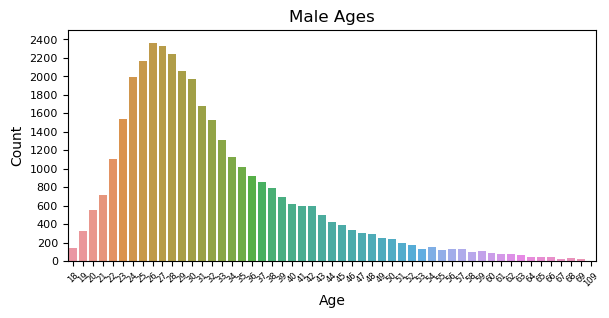

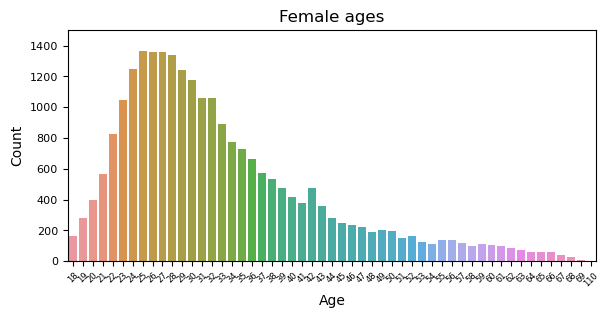

In [302]:
male_profiles = profiles[profiles['sex'] == 'm']

Age_distribution_male = male_profiles.age.value_counts()

Age_distribution_male = Age_distribution_male.reset_index()
Age_distribution_male.columns = ['Ages', 'Counts']
plt.figure(figsize=(15, 3))
plt.subplot(1, 2, 1)
sns.barplot(x='Ages', y='Counts', data=Age_distribution_male)
plt.xticks(fontsize=6, rotation=45)
plt.yticks(range(0, 2500, 200), fontsize=8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.ylim(0, 2500)
plt.title('Male Ages')

female_profiles = profiles[profiles['sex'] == 'f']

Age_distribution_female = female_profiles.age.value_counts()

Age_distribution_female = Age_distribution_female.reset_index()
Age_distribution_female.columns = ['Ages', 'Counts']
plt.figure(figsize=(15, 3))
plt.subplot(1, 2, 1)
sns.barplot(x='Ages', y='Counts', data=Age_distribution_female)
plt.xticks(fontsize=6, rotation=45)
plt.yticks(range(0, 1500, 200), fontsize=8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.ylim(0, 1500)
plt.title('Female ages')
plt.show()

In [218]:
print("The average age of the dataset:", round(profiles.age.mean(), 1))
print("The middle value of the age data:", profiles.age.median())
print("The most frequently occurring age value in the dataset:", profiles.age.mode()[0])

The average age of the dataset: 32.3
The middle value of the age data: 30.0
The most frequently occurring age value in the dataset: 26


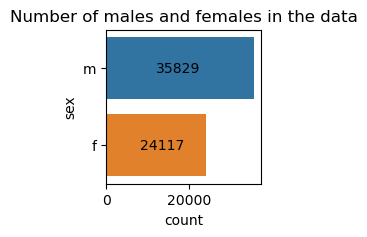

In [167]:
plt.figure(figsize=(2, 2))
sns.countplot(data=profiles, y="sex")
plt.title('Number of males and females in the data')
#Printing exact values inside the bars
for bar in plt.gca().patches:
    count = int(bar.get_width())
    plt.text(bar.get_width() / 3, bar.get_y() + bar.get_height() / 2, count, ha='left', va='center')
plt.show()

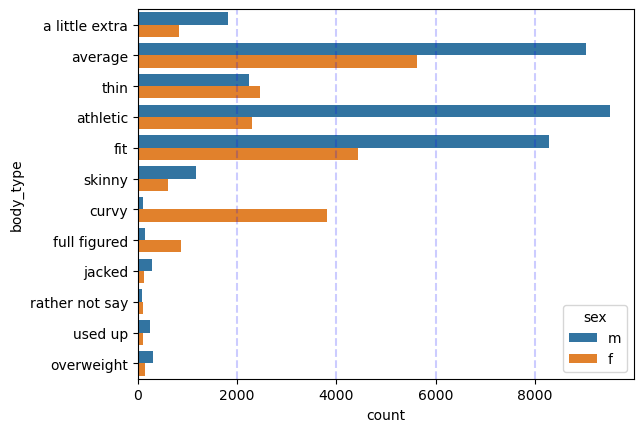

In [361]:
sns.countplot(data=profiles, y="body_type", hue="sex")
step = 2000
max_count = 10000
for i in range(0, max_count, step):
    plt.axvline(x=i, color='blue', linestyle='--', alpha=0.2)
plt.show()

In [226]:
print(profiles.diet.unique())
print("How many profiles doesnt report diet ->", profiles['diet'].isnull().sum())

['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']
How many profiles doesnt report diet -> 24395


#### Can we predict user location based of other data?

In [191]:
null_count = profiles['location'].isnull().sum()
print("Number of null values in the 'location' column:", null_count)

Number of null values in the 'location' column: 0


In [103]:
print("Total number of unique locations:", profiles.location.nunique())

Total number of unique locations: 199


In [193]:
profiles['LocationCleaned'] = profiles.location.str.split().str.get(-1)
print("Number of unique locations after tidying data:",profiles.LocationCleaned.nunique())
print("")
print("Location categories:", profiles.LocationCleaned.unique())
profiles.LocationCleaned.value_counts()

Number of unique locations after tidying data: 40

Location categories: ['california' 'colorado' 'york' 'oregon' 'arizona' 'hawaii' 'montana'
 'wisconsin' 'virginia' 'spain' 'nevada' 'illinois' 'vietnam' 'ireland'
 'louisiana' 'michigan' 'texas' 'kingdom' 'massachusetts' 'carolina'
 'idaho' 'mississippi' 'jersey' 'florida' 'minnesota' 'georgia' 'utah'
 'washington' 'connecticut' 'tennessee' 'island' 'columbia' 'canada'
 'missouri' 'germany' 'pennsylvania' 'netherlands' 'switzerland' 'mexico'
 'ohio']


LocationCleaned
california       59855
york                17
illinois             8
massachusetts        5
michigan             4
texas                4
oregon               4
florida              3
arizona              3
virginia             3
washington           2
utah                 2
kingdom              2
georgia              2
minnesota            2
columbia             2
colorado             2
ohio                 2
spain                2
hawaii               2
louisiana            1
island               1
mexico               1
switzerland          1
netherlands          1
pennsylvania         1
germany              1
missouri             1
canada               1
tennessee            1
carolina             1
connecticut          1
montana              1
wisconsin            1
nevada               1
vietnam              1
jersey               1
mississippi          1
ireland              1
idaho                1
Name: count, dtype: int64

#### Too many profiles in california :

- We probably have too many 'California' location values to create an interesting model for predicting locations on a broader scale.
- I dont find it interesting enought to use machine learning model to predict locations inside california.


#### Should we predict income ?

In [83]:
profiles.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [189]:
removed_nan_income = (profiles[profiles.income != -1])
a = removed_nan_income.reset_index()
print("Total amount of income values:",len(a))
print("Percentage of profiles report income (%):",len(a)*100/len(profiles))

Total amount of income values: 11504
Percentage of profiles report income (%): 19.190604877723285


#### Only ~20% of profiles report income. Lets find something else to predict.

In [241]:
profiles.isnull().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

In [253]:
print(profiles.drugs.unique())
print(profiles.drinks.unique())
print(profiles.orientation.unique())
print(profiles.smokes.unique())
print(profiles.status.unique())
print(profiles.status.value_counts())

['never' 'sometimes' nan 'often']
['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']
['straight' 'bisexual' 'gay']
['sometimes' 'no' nan 'when drinking' 'yes' 'trying to quit']
['single' 'available' 'seeing someone' 'married' 'unknown']
status
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: count, dtype: int64


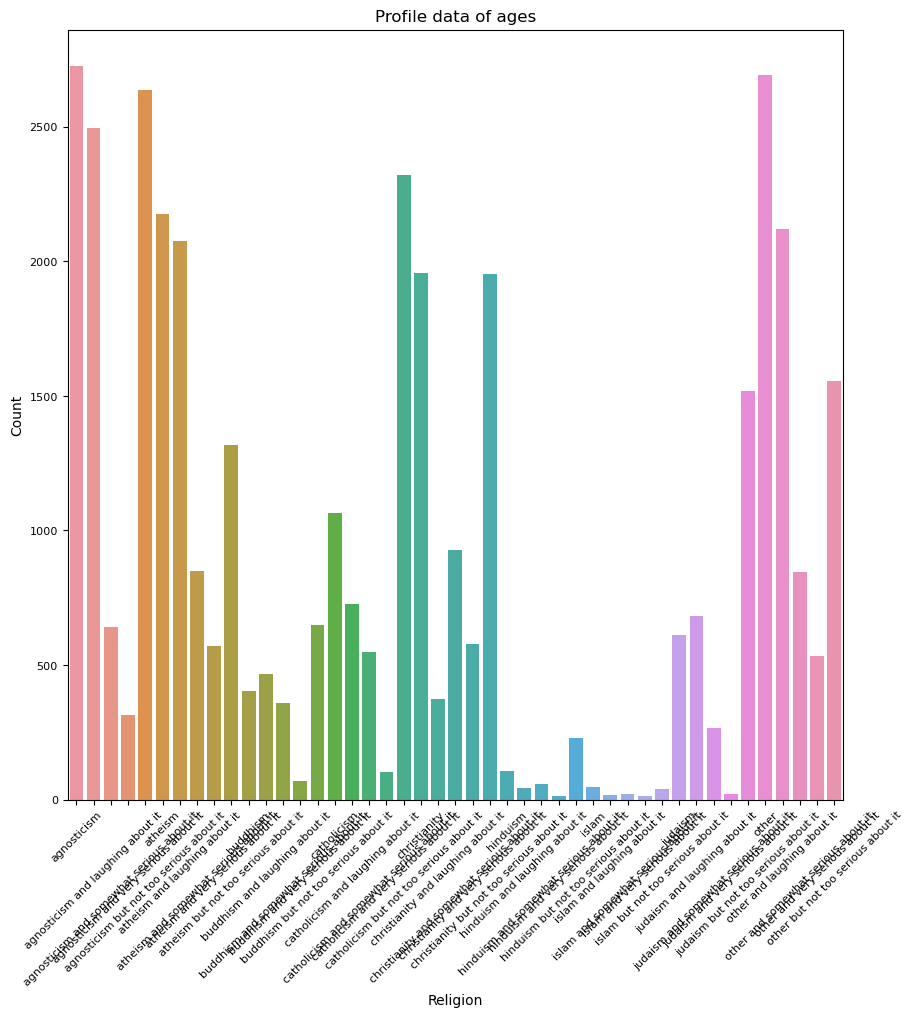

In [352]:
Religion_distribution = profiles.religion.value_counts()
Religion_distribution = Religion_distribution.reset_index()
Religion_distribution.columns = ['Religion' ,'Counts']

data = Religion_distribution.sort_values("Religion")

plt.figure(figsize=(10, 10))
sns.barplot(x='Religion', y='Counts', data=data)
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)
plt.xlabel('Religion')
plt.ylabel('Count')
plt.title('Profile data of ages')
plt.show()

#### Let's find out if it's possible to predict, with the given data, whether a user is male or female with an accuracy of more than 50%.

- So first we need to choose columns (features) and clean data
- Lets use features: body_type, drinks, orientation, smokes, religion, pets, sex, job and sign.
- Age distribution looks almost the same for males and females, so lets leave it out.
- Lets also think if we wan to include essay0-2 with len() function.

In [516]:
#Fill nan values with "unknown"
profiles["signReady"] = profiles.sign.fillna("unknown")
profiles.signReady.isnull().sum()

0

In [517]:
#not included
#profiles["essay0Ready"] = profiles["essay0"].apply(lambda x: len(str(x)))
#profiles["essay1Ready"] = profiles["essay1"].apply(lambda x: len(str(x)))
#profiles["essay2Ready"] = profiles["essay2"].apply(lambda x: len(str(x)))

In [518]:
cols = ['body_type', 'drinks', 'orientation', 'smokes', 'religion', 'pets',
       'job', 'signReady', 'sex']
df = profiles[cols].dropna()
print("Total amount of rows left after cleanup:",df2.shape[0])

for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

print("Total amount of columns left after hot encoding:",df.shape[1])

Total amount of rows left after cleanup: 24473
Total amount of columns left after hot encoding: 157


In [565]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

test_size = 0.2

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state = 5)

In [566]:
#Try out tree models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### 1) LogisticRegression

In [567]:
lr_model = LogisticRegression(multi_class="multinomial").fit(X_train, y_train)
lr_predictions = lr_model.predict(X_train)

print(classification_report(y_train, lr_predictions))

confusion_matrix1 = confusion_matrix(y_train, lr_predictions)
print("Confusion matrix:")
print(confusion_matrix1)

C:\Users\Toni\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           f       0.75      0.60      0.67      8013
           m       0.76      0.86      0.80     11565

    accuracy                           0.75     19578
   macro avg       0.75      0.73      0.74     19578
weighted avg       0.75      0.75      0.75     19578

Confusion matrix:
[[4817 3196]
 [1623 9942]]


#### 2) k-nearest neighbors

In [568]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
knn_predictions = knn_model.predict(X_train)

print(classification_report(y_train, knn_predictions))

confusion_matrix2 = confusion_matrix(y_train, knn_predictions)
print("Confusion matrix:")
print(confusion_matrix2)

              precision    recall  f1-score   support

           f       0.80      0.68      0.73      8013
           m       0.80      0.88      0.84     11565

    accuracy                           0.80     19578
   macro avg       0.80      0.78      0.78     19578
weighted avg       0.80      0.80      0.79     19578

Confusion matrix:
[[ 5427  2586]
 [ 1397 10168]]


#### 3) Decision Tree

In [569]:
DTC = DecisionTreeClassifier().fit(X_train, y_train) 
DTC_predictions = DTC.predict(X_train)

print("Depth of the decision tree classifier:",DTC.get_depth())
print("")
print(classification_report(y_train, DTC_predictions))

confusion_matrix3 = confusion_matrix(y_train, DTC_predictions)

labels1 = ['Predicted Positive', 'Predicted Negative']
labels2 = ['Actual Positive', 'Actual Negative']

cm = pd.DataFrame(confusion_matrix3, index=labels1, columns=labels2)
print("Confusion matrix:")
print(cm)

Depth of the decision tree classifier: 86

              precision    recall  f1-score   support

           f       0.99      1.00      0.99      8013
           m       1.00      0.99      1.00     11565

    accuracy                           0.99     19578
   macro avg       0.99      1.00      0.99     19578
weighted avg       0.99      0.99      0.99     19578

Confusion matrix:
                    Actual Positive  Actual Negative
Predicted Positive             8005                8
Predicted Negative               99            11466


#### Final comments

- In this project different machine learning models were trained to predict the gender of the profile users. Without further tuning, DecisionTreeClassifier model were trained to achieved a prediction accuracy of 99%.

- In further time I could use ensemble methods or hyperparameter tuning to enhance the model further.